In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def x1(time):
    X = []
    for t in time:
            X.append(math.sin(-2*t*t + 7*t) - 1/2*math.sin(t))
    return np.array(X)

In [3]:
def x2(time):
    X = []
    for t in time:
            X.append(math.sin(t*t - 6*t + 3))
    return np.array(X)

In [4]:
def y(time):
    Y = []
    for t in time:
            Y.append(math.sin(t*t - 6*t - math.pi/6)/3)
    return np.array(Y)

In [5]:

class Adaline():

    def __init__(self, D=5, time = np.arange(0, 4.5, 0.025)):
        self.weights = 2 * np.random.rand(D).T - 1 # Веса, -1 > w < 1
        self.b = np.random.rand(1) - 1
        self.delay = D
        self.time = time
                
    def predict(self, x):
        return np.dot(x, self.weights) + self.b

    def transform(self):
        X_num = []
        for i in range(len(self.X) - self.delay):
            for elem in self.X[i:self.delay+i]:
                X_num.append(elem)
        X_num = np.array(X_num)
        X_num = np.reshape(X_num,(int(len(X_num)/self.delay),self.delay))
        return X_num

    def train(self, X, len_rate = 0.01,epochs = 50):
        self.X = X
        self.Y = X
        Y = X[self.delay:]
        X_num = self.transform()
        for epoch in range(epochs):
            self.Y_pred = []
            self.losses = []
            for x_curr, y_curr in zip(X_num,Y):  
                y_predict = self.predict(x_curr)
                self.Y_pred.append(y_predict)
                err = (y_curr - y_predict)
                self.losses.append(err)
                err_sq = (err*err)/2
                self.weights += len_rate * x_curr * err
                self.b += len_rate * err
        print("sqrt(mse): {}".format(mean_squared_error(Y, self.Y_pred)))
        print("result weights and b: {}, {}".format(self.weights, self.b))
        plt.figure(figsize=(13,7))
        x_line = self.time[self.delay:]
        y_line = self.losses
        y_line = np.array(y_line).ravel()
        plt.plot(x_line, y_line, color = "green")
        self.show_plot()
        return self.Y_pred
        
            

    def show_plot(self):
        plt.figure(figsize=(13,7))
        x_line = self.time 
        y_line = self.Y
        x_line1 = x_line[self.delay:]
        y_line1 = self.Y_pred
        plt.plot(x_line, y_line, color = "blue")
        plt.plot(x_line1, y_line1, 'r-.')
        plt.show()


D = 1
sqrt(mse): 0.009284954692481749
result weights and b: [0.97477034], [-0.00353293]


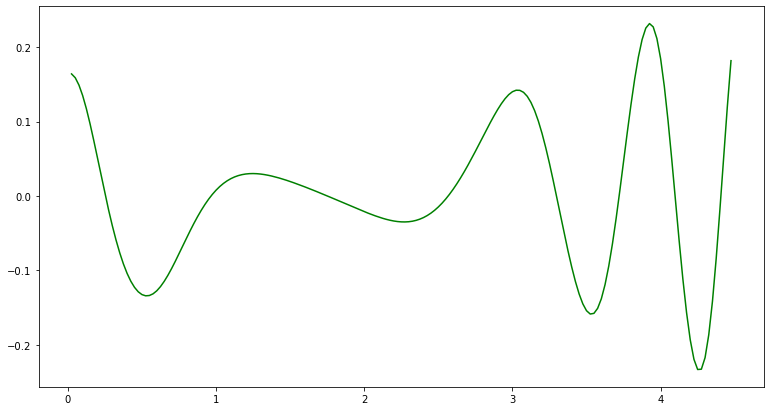

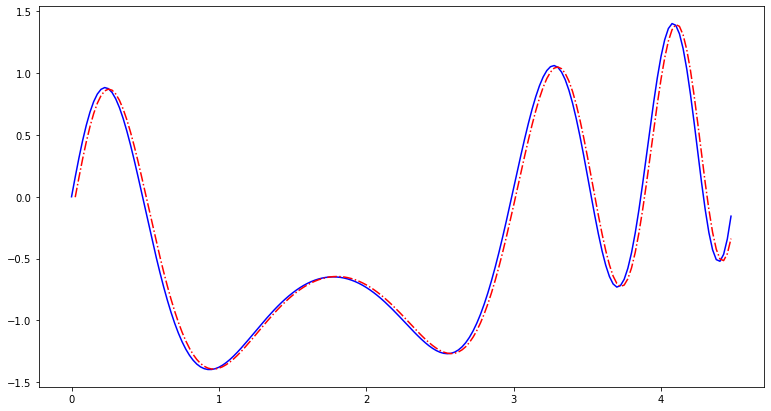

D = 2
sqrt(mse): 0.009458041752172791
result weights and b: [-0.00604555  0.96208596], [-0.00493285]


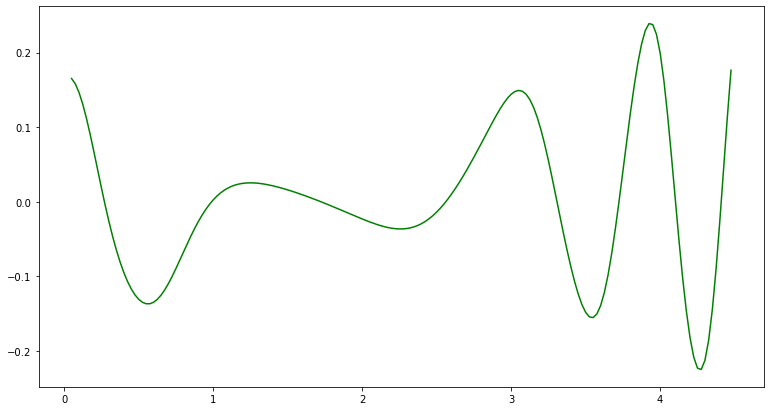

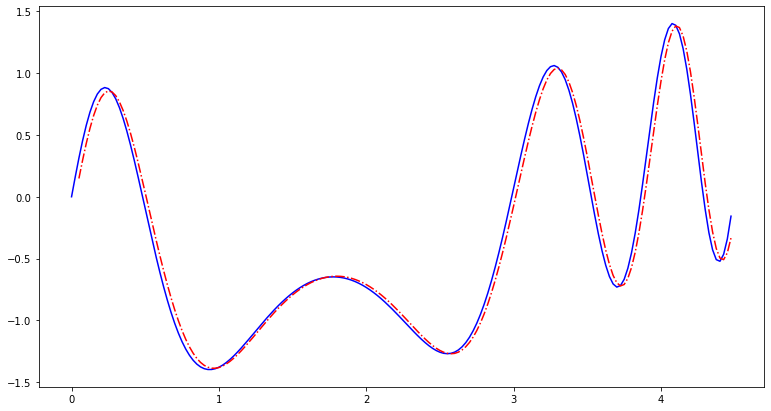

D = 3
sqrt(mse): 0.004085455678676035
result weights and b: [-0.59214826  0.75555564  0.77108632], [-0.0026913]


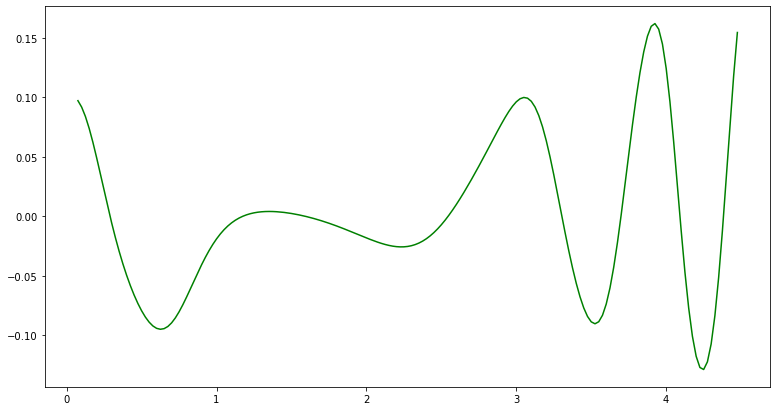

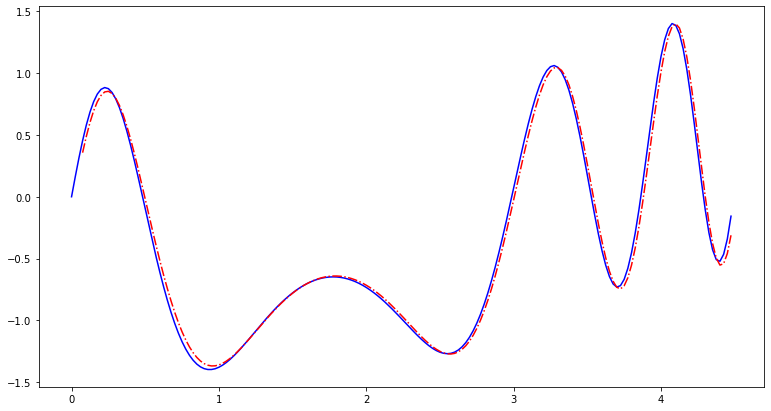

D = 4
sqrt(mse): 0.0009136402891265998
result weights and b: [-0.31069639 -0.03859594  0.07300662  1.21273942], [0.00236218]


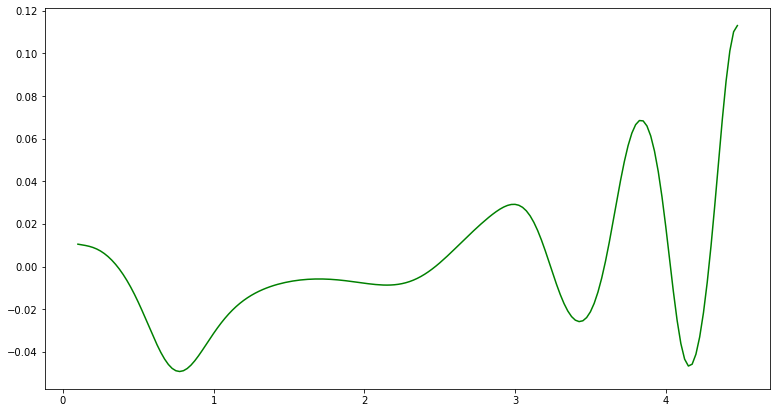

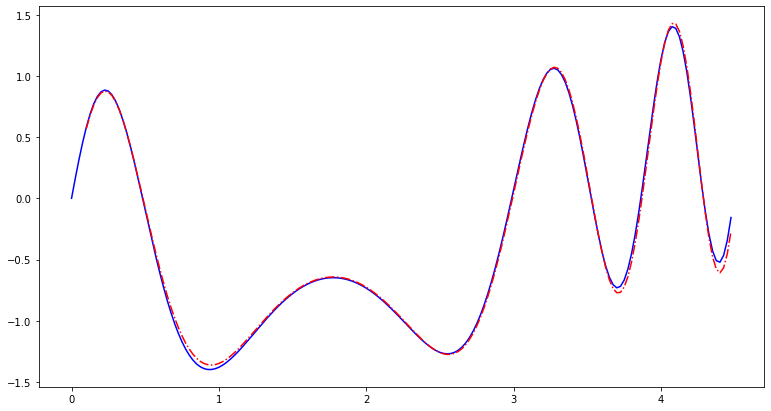

D = 5
sqrt(mse): 0.0018665520132024678
result weights and b: [-0.25099001 -0.54284002  0.8258574  -0.11558372  0.98052279], [0.00663098]


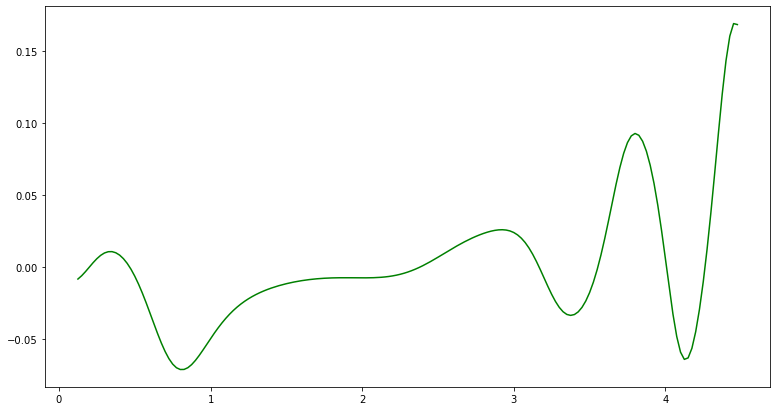

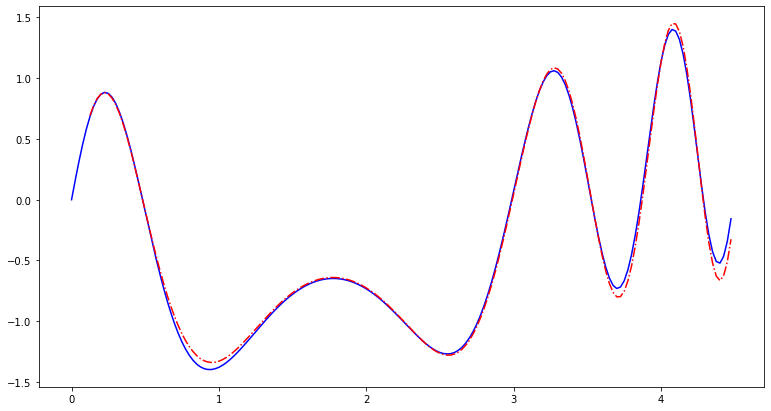

In [6]:
time = np.arange(0, 4.5, 0.025)
X = x1(time)

for D in range(1,6):
    print("D = {}".format(D))
    ad = Adaline(D)
    ad.train(X)
    



In [13]:
class Adaline():

    def __init__(self, D=5, time = np.arange(0, 4.5, 0.025)):
        self.weights = 2 * np.random.rand(D).T - 1 # Веса, -1 > w < 1
        self.b = np.random.rand(1) - 1
        self.delay = D
        self.time = time
                
    def predict(self, x):
        return np.dot(x, self.weights) + self.b

    def transform(self):
        X_num = []
        for i in range(len(self.X) - self.delay):
            for elem in self.X[i:self.delay+i]:
                X_num.append(elem)
        X_num = np.array(X_num)
        X_num = np.reshape(X_num,(int(len(X_num)/self.delay),self.delay))
        return X_num
    
    def errors(self):
        Y = self.transform()[1]
        k5 = 0
        k510 = 0
        k1020 = 0
        k2030 = 0
        k30 = 0
        for elem, err in zip(Y, self.losses):
            res = err/elem * 100
            if res < 5:
                k5 += 1
            elif res > 5 and res < 10:
                k510 += 1
            elif res > 10 and res < 20:
                k1020 += 1
            elif res > 20 and res < 30:
                k2030 += 1
            elif res > 30:
                k30 += 1
        self.result = []
        self.result.append(k5)
        self.result.append(k510)
        self.result.append(k1020)
        self.result.append(k2030)
        self.result.append(k30)

    def train(self, X, len_rate = 0.01,epochs = 50):
        self.X = X
        self.Y = X
        Y = X[self.delay:]
        X_num = self.transform()
        for epoch in range(epochs):
            self.Y_pred = []
            self.losses = []
            for x_curr, y_curr in zip(X_num,Y):  
                y_predict = self.predict(x_curr)
                self.Y_pred.append(y_predict)
                err = (y_curr - y_predict)
                self.losses.append(err)
                err_sq = (err*err)/2
                self.weights += len_rate * x_curr * err
                self.b += len_rate * err
        print("sqrt(mse): {}".format(mean_squared_error(Y, self.Y_pred)))
        print("result weights and b: {}, {}".format(self.weights, self.b))
#         plt.figure(figsize=(13,7))
#         x_line = self.time[self.delay:]
#         y_line = self.losses
#         y_line = np.array(y_line).ravel()
#         plt.plot(x_line, y_line, color = "green")
        print("sqrt(mse): {}".format(mean_squared_error(Y, self.Y_pred)))
        print("result weights and b: {}, {}".format(self.weights, self.b))
        print("r2 score for perfect model is {}".format(r2_score(Y, self.Y_pred)))
        print("max y: {}, min y: {}".format(max(Y), min(Y)))
        print("mae: {}".format(mean_absolute_error(Y, self.Y_pred)))
        print("min mae: {}".format(min(self.losses)))
        print("max mae: {}".format(max(self.losses)))
        print("mape: {}".format(mean_absolute_percentage_error(Y, self.Y_pred)))
        self.errors()
        print("< 5, 5-10, 10-20, 20-30, >30: {}, ".format([x/len(self.Y_pred)*100 for x in self.result]))
        self.show_plot()
        self.show_plot()
        return self.Y_pred
        
            

    def show_plot(self):
        plt.figure(figsize=(13,7))
        x_line = self.time[:-1] 
        y_line = self.Y[:-1]
        x_line1 = self.time[self.delay:len(self.time)]
        y_line1 = self.Y_pred
        plt.plot(x_line, y_line, color = "blue")
        plt.plot(x_line1, y_line1, 'r-.')
        plt.show()


D = 3
sqrt(mse): 0.0006571062537039243
result weights and b: [-0.39367132 -0.07562321  1.44662549], [-0.00716245]
sqrt(mse): 0.0006571062537039243
result weights and b: [-0.39367132 -0.07562321  1.44662549], [-0.00716245]
r2 score for perfect model is 0.9989855840665145
max y: 1.401484551809088, min y: -1.3979916943560786
mae: 0.01894757317863157
min mae: [-0.05016659]
max mae: [0.1040486]
mape: 0.05632870937340202
< 5, 5-10, 10-20, 20-30, >30: [0.5649717514124294, 0.5649717514124294, 0.5649717514124294, 0.0, 0.0], 


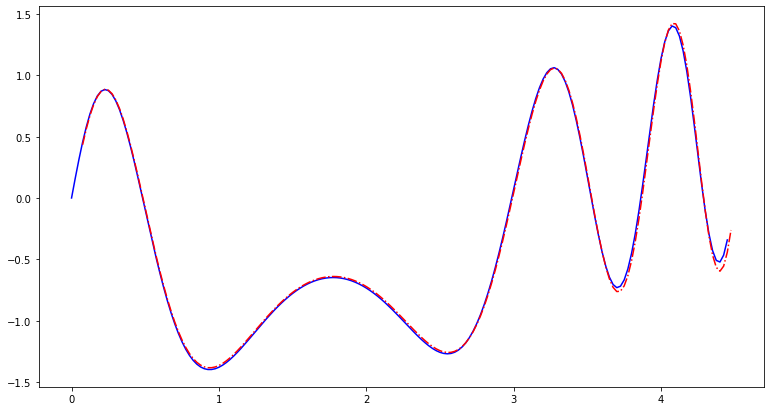

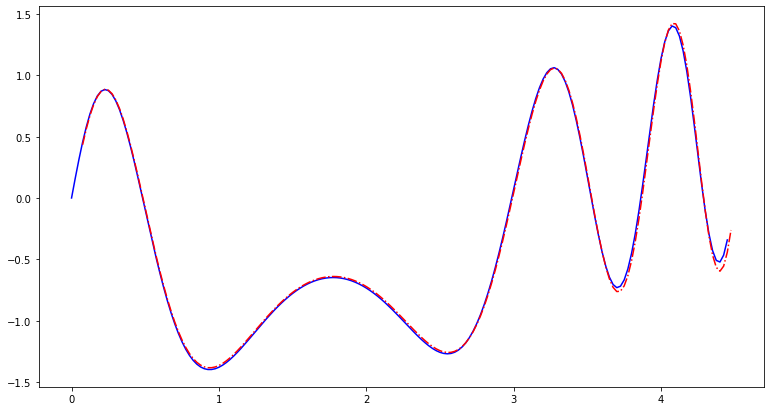

3


In [14]:
D = 3
print("D = {}".format(D))
ad = Adaline(D)
ad.train(X, len_rate = 0.001,epochs = 600)
print(D)    

sqrt(mse): 0.0009928126710606524
result weights and b: [-0.32362676 -0.10405625  1.40484712], [-0.00745692]
sqrt(mse): 0.0009928126710606524
result weights and b: [-0.32362676 -0.10405625  1.40484712], [-0.00745692]
r2 score for perfect model is 0.9984673331187865
max y: 1.401484551809088, min y: -1.3979916943560786
mae: 0.024032631822643875
min mae: [-0.06417612]
max mae: [0.11339544]
mape: 0.08399327458369835
< 5, 5-10, 10-20, 20-30, >30: [0.0, 0.5649717514124294, 0.5649717514124294, 0.5649717514124294, 0.0], 


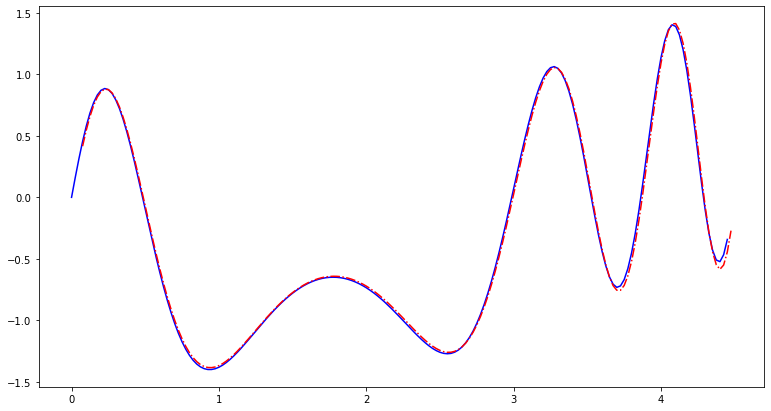

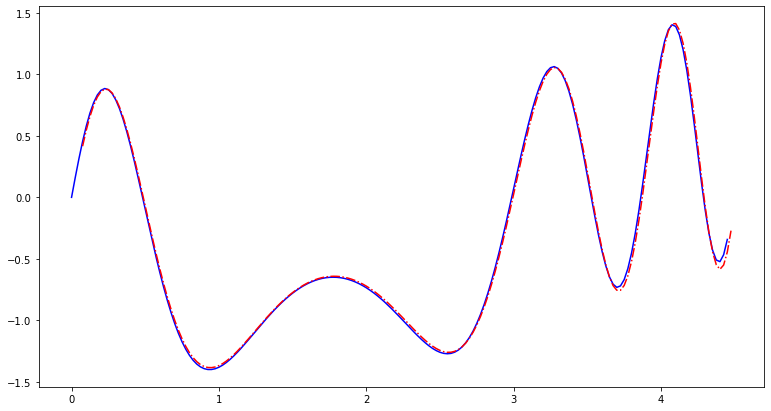

sqrt(mse): 0.0017914222780563386
result weights and b: [-0.28426493 -0.09111301  1.35384464], [-0.00355752]
sqrt(mse): 0.0017914222780563386
result weights and b: [-0.28426493 -0.09111301  1.35384464], [-0.00355752]
r2 score for perfect model is 0.9974787442396418
max y: 1.4996070858932302, min y: -1.3979916943560786
mae: 0.03231199073505795
min mae: [-0.08535752]
max mae: [0.13202939]
mape: 0.12034734123312125
< 5, 5-10, 10-20, 20-30, >30: [0.0, 0.5376344086021506, 0.5376344086021506, 0.0, 0.5376344086021506], 


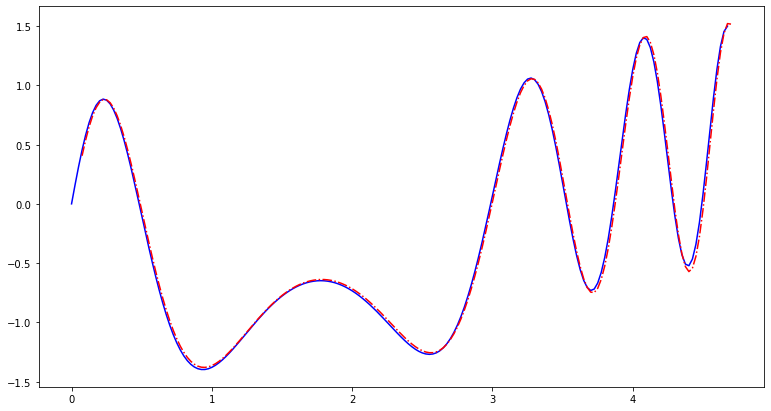

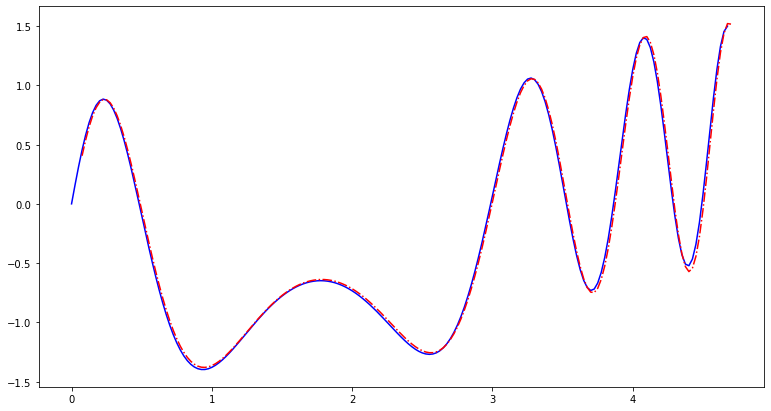

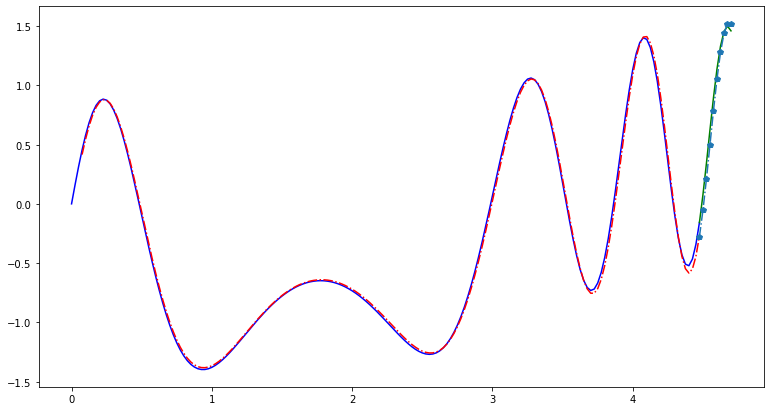

In [15]:
time = np.arange(0, 4.5, 0.025)
time2 = np.arange(0, 4.475 + 0.025 * 10, 0.025)
X2 = x1(time2)
X = x1(time)


ad = Adaline(D)
Y_pred = []
Y_pred = ad.train(X, len_rate = 0.001,epochs = 600)

ad = Adaline(D,time2)
Y_pred1 = []
Y_pred1 = ad.train(X2, len_rate = 0.001,epochs = 600)
 


plt.figure(figsize=(13,7))
x_line = time 
y_line = x1(time)
x_line1 = x_line[D:]
y_line1 = Y_pred
x_line2 = time2[-10::] 
y_line2 = X2[-10::]
y_line3 = Y_pred1[-10::]
plt.plot(x_line, y_line, color = "blue")
plt.plot(x_line1, y_line1, 'r-.')
plt.plot(x_line2, y_line2, color = "green")
plt.plot(x_line2, y_line3, 'p-.')
plt.show()

In [ ]:
class AdaptLin():

    def __init__(self, D=5, time = np.arange(0, 4.5, 0.025)):
        self.weights = 2 * np.random.rand(D) - 1 # Веса, -1 > w < 1
        self.b = np.random.rand(1) - 1
        self.delay = D
        self.time = time
        self.err = []
                
    def predict(self, x):
        return np.dot(x, self.weights) + self.b
            
    def transform(self):
        Y_num = []
        X_num = np.zeros((len(X) - self.delay, self.delay))
        for i in range(X.shape[0] - self.delay):
            X_num[i] = X[i:i+self.delay]
        Y_num = self.Y[self.delay:]
        return X_num, Y_num

    def train(self, X, Y, len_rate = 0.1,epochs = 500):
        self.X = X
        self.Y = Y
        X_num, Y_num = self.transform()
        for epoch in range(epochs):
            self.Y_pred = []
            self.losses = []
            for x_curr, y_curr in zip(X_num,Y_num):  
                y_predict = self.predict(x_curr)
                self.Y_pred.append(y_predict)
                err = (y_curr - y_predict)
                self.err.append(math.fabs(err))
                self.losses.append(math.fabs(err))
                self.weights += len_rate * x_curr * err
                self.b += len_rate * err
        print("sqrt(mse): {}".format(mean_squared_error(Y_num, self.Y_pred)))
        print("result weights and b: {}, {}".format(self.weights, self.b))
        print("r2 score for perfect model is {}".format(r2_score(Y_num, self.Y_pred)))
        print("max y: {}, min y: {}".format(max(Y_num), min(Y_num)))
        print("mae: {}".format(mean_absolute_error(Y_num, self.Y_pred)))
        print("min mae: {}".format(min(self.losses)))
        print("max mae: {}".format(max(self.losses)))
        print("mape: {}".format(mean_absolute_percentage_error(Y_num, self.Y_pred)))
        self.errors()
        print("< 5, 5-10, 10-20, 20-30, >30: {}, ".format([x/len(self.Y_pred)*100 for x in self.result]))
        self.show_plot()
        
    def errors(self):
        Y = self.transform()[1]
        k5 = 0
        k510 = 0
        k1020 = 0
        k2030 = 0
        k30 = 0
        for elem, err in zip(Y, self.losses):
            res = err/elem * 100
            if res < 5:
                k5 += 1
            elif res > 5 and res < 10:
                k510 += 1
            elif res > 10 and res < 20:
                k1020 += 1
            elif res > 20 and res < 30:
                k2030 += 1
            elif res > 30:
                k30 += 1
        self.result = []
        self.result.append(k5)
        self.result.append(k510)
        self.result.append(k1020)
        self.result.append(k2030)
        self.result.append(k30)

    def show_plot(self):
        plt.figure(figsize=(13,7))
        x_line = self.time
        y_line = X
        x_line1 = self.time[self.delay:]
        y_line1 = self.Y_pred
        y_line2 = Y[self.delay:]
        plt.plot(x_line, y_line, color = "green",label = "x2")
        plt.plot(x_line1, y_line2, color = "blue", label = "y")
        plt.plot(x_line1, y_line1, 'r-.', label = "y_pred")
        plt.show()


In [ ]:
time = np.arange(0, 6, 0.025)
X = x2(time)
Y = y(time)
D = 4

In [ ]:
ad = AdaptLin(D,time = time)
ad.train(X,Y)